In [2]:
pip install Textblob

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 41.5/41.5 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------------ --------------------------- 194.6/626.3 kB 5.9 MB/s eta 0:00:01
   ---------------------- ----------------- 358.4/626.3 kB 4.5 MB/s eta 0:00:01
   ----------------------------------- ---- 553.0/626.3 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.5 MB 4.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.5 MB 4.5 MB/s eta 0:00:01
   -


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('twitter_training.csv')

In [7]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
col_names=['ID','Entity','Sentiments','Contest']
df=pd.read_csv('twitter_training.csv',names=col_names)

In [10]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
df.shape

(74682, 4)

In [14]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

In [15]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [16]:
df.dropna(axis=0,inplace=True)

In [17]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [18]:
df.duplicated().sum()

2340

In [19]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [20]:
df.shape

(71656, 4)

In [23]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

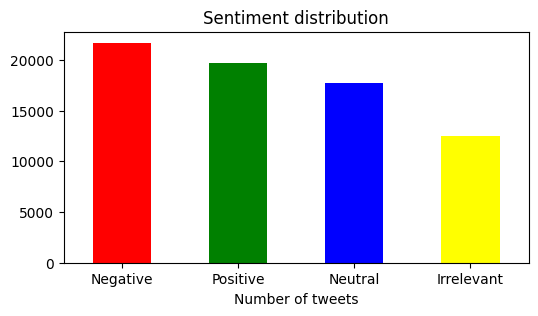

In [25]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['red','green','blue','yellow'])
plt.title('Sentiment distribution')
plt.xlabel('Number of tweets')
plt.xticks(rotation=0)
plt.show()

In [27]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
brand_sentiment_counts

Sentiments
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

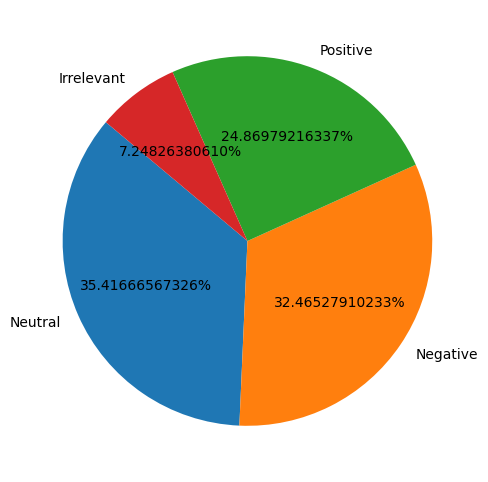

In [29]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_counts,labels=brand_sentiment_counts.index,autopct='%1.11f%%',startangle=140)
plt.show()